In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv ('Flat_dataset_moscow.csv', sep=';')

* Процент пропущенных данных в столбцах

In [3]:
df.head()
def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result
percent_nan = percent_missing(df)

In [4]:
df

,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,...,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница дат,Дата регистрации модель,version,Участок,Цена кв. м,ID дом.рф
0,4983,Авиатика,NaN,Хорошевский,САО,Москва,САО,Э.К. Девелопмент,"квартира № 183, этаж №22, площадь:58.6 кв. м, ...","58,6",...,Нет,0,ЗФ,Оценка по среднему,5,24.05.2022,1,77:09:0005007:17421,392820,36565.0
1,4983,Авиатика,NaN,Хорошевский,САО,Москва,САО,Э.К. Девелопмент,"3-комнатаня квартира № 89, этаж №11, площадь:...","90,7",...,Нет,0,ЗФ,Оценка по номеру,15,26.05.2022,1,77:09:0005007:17421,368500,36565.0
2,4983,Авиатика,NaN,Хорошевский,САО,Москва,САО,Э.К. Девелопмент,"4-х комнатная квартира № 159, этаж №19, площад...","105,5",...,Нет,0,ЗФ,Оценка по номеру,18,17.05.2022,1,77:09:0005007:17421,327900,36565.0
3,4983,Авиатика,NaN,Хорошевский,САО,Москва,САО,Э.К. Девелопмент,"1-комнатная квартира № 134, этаж №16, площадь:...","22,2",...,Нет,0,ЗФ,Оценка по номеру,19,17.05.2022,1,77:09:0005007:17421,509600,36565.0
4,4983,Авиатика,NaN,Хорошевский,САО,Москва,САО,Э.К. Девелопмент,"квартира № 122, этаж №15 (секция 1), площадь:8...","88,8",...,Нет,0,ЗФ,Оценка по среднему,22,12.05.2022,1,77:09:0005007:17421,369600,36565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39194,5151,Я51,NaN,Ярославский,СВАО,Москва,СВАО,Patek,"квартира № 6, этаж №2, площадь:37.31 кв. м, го...","37,3",...,Нет,0,ЗФ,Оценка по среднему,190,03.08.2021,1,77:02:0016002:8,"250603,0027",39502.0
39195,5151,Я51,NaN,Ярославский,СВАО,Москва,СВАО,Patek,"квартира № 5, этаж №2, площадь:36.24 кв. м, го...","36,2",...,Нет,0,ЗФ,Оценка по среднему,190,03.08.2021,1,77:02:0016002:8,"250603,011",39502.0
39196,5151,Я51,NaN,Ярославский,СВАО,Москва,СВАО,Patek,"квартира № 138, этаж №15, площадь:76.73 кв. м,...","76,7",...,Нет,0,ЗФ,Оценка по среднему,215,21.07.2021,1,77:02:0016002:8,"220464,0026",39502.0
39197,5151,Я51,NaN,Ярославский,СВАО,Москва,СВАО,Patek,"машино-место № 7, этаж №-1, площадь:13.25 кв. ...","13,3",...,Нет,0,ЗФ,Оценка по среднему,215,21.07.2021,1,77:02:0016002:8,"119764,5113",39502.0


* Избавимся от неинформативных данных, на основе знаний о предметной области

In [5]:
df=df[['ID ЖК', 'ЖК рус', 'Район Город', 'Округ Направление',
       'Регион','Застройщик ЖК', 'Площадь',
       'Комнатность', 'Тип Комнатности', 'Этаж', 'Тип помещения',
       'Дата регистрации', 'Тип обременения', 'Оценка цены','Купил лотов в ЖК',
       'класс', 'Срок сдачи', 'Отделка','Зона', 'Стадия строительства в дату ДДУ',
       'Тип сделки', 'Цена кв. м']]

## Исходные данные представлены в неподходящем виде:
* данные содержат запятые
* скобки, которые не позволяют работать с текстовыми данными
* некоторые данные представлены в виде строк, а могут быть представлены в виде чисел

In [6]:
df["Площадь"]=df["Площадь"].str.replace(',','.')
df["Площадь"] = df.Площадь.astype(float)
df["Цена кв. м"]=df["Цена кв. м"].str.replace(',','.')
df["Цена кв. м"] = df["Цена кв. м"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39199 entries, 0 to 39198
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID ЖК                            39199 non-null  int64  
 1   ЖК рус                           39199 non-null  object 
 2   Район Город                      39199 non-null  object 
 3   Округ Направление                39199 non-null  object 
 4   Регион                           39199 non-null  object 
 5   Застройщик ЖК                    39199 non-null  object 
 6   Площадь                          39199 non-null  float64
 7   Комнатность                      10386 non-null  float64
 8   Тип Комнатности                  26427 non-null  object 
 9   Этаж                             39199 non-null  int64  
 10  Тип помещения                    39199 non-null  object 
 11  Дата регистрации                 39199 non-null  object 
 12  Тип обременения   

C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\2179434379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Площадь"]=df["Площадь"].str.replace(',','.')
C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\2179434379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Площадь"] = df.Площадь.astype(float)
C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\2179434379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

 * В столбце Комнатность большое количество пропусков, его целесообразно удалить, тем более, что его данные дублируются в столбце Тип комнатности

In [7]:
del df['Комнатность']

* Избавимся от всех не квартир, т.к. в данных есть офисы и т.д.

In [8]:
df = df[df['Тип помещения'] == 'квартира']

* Посмотрим корреляции

In [9]:
df.corr()['Цена кв. м'].sort_values()

C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\1916346402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Цена кв. м'].sort_values()


ID ЖК              -0.119617
Купил лотов в ЖК   -0.052514
Этаж                0.050936
Площадь             0.256620
Оценка цены         0.709024
Цена кв. м          1.000000
Name: Цена кв. м, dtype: float64

* Просмотрим график зависимости цены от оценки на предмет выбросов 

<AxesSubplot: xlabel='Оценка цены', ylabel='Цена кв. м'>

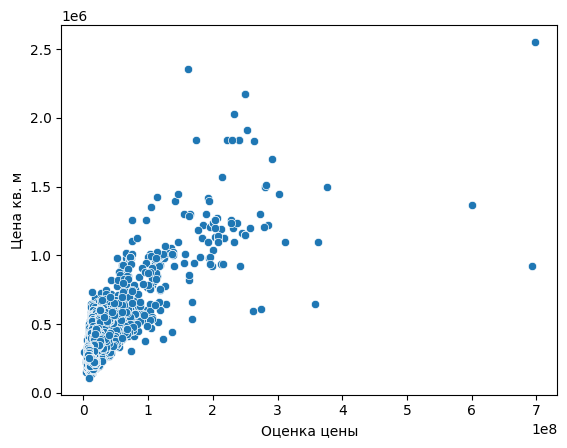

In [10]:
sns.scatterplot(x='Оценка цены',y='Цена кв. м',data=df)

Строки с выбросами 

In [11]:
ind_drop = df[(df['Оценка цены']>5*10**8) | (df["Цена кв. м"]>2.2*10**6)].index
ind_drop

Int64Index([12180, 14012, 34991, 38360], dtype='int64')

<AxesSubplot: xlabel='Оценка цены', ylabel='Цена кв. м'>

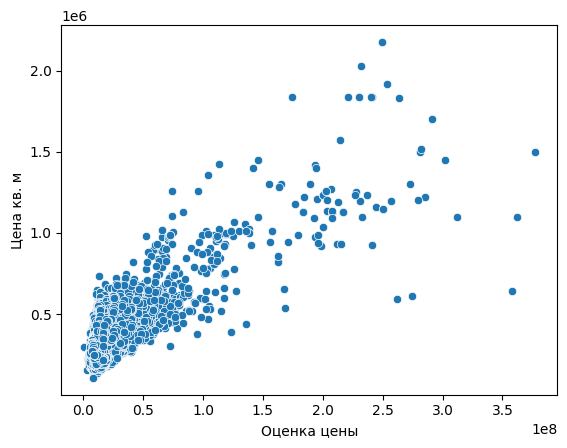

In [12]:
df = df.drop(ind_drop,axis=0)
sns.scatterplot(x='Оценка цены',y='Цена кв. м',data=df)

<AxesSubplot: xlabel='Оценка цены', ylabel='Цена кв. м'>

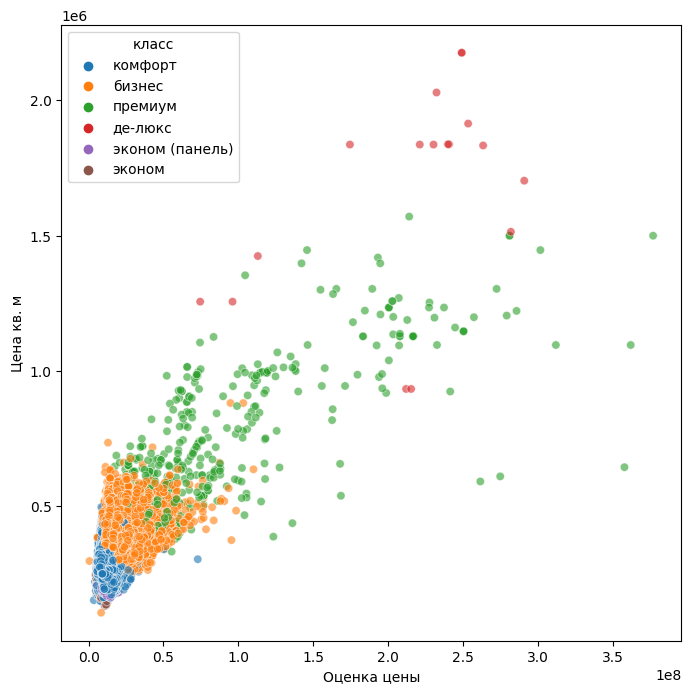

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Оценка цены',y='Цена кв. м',data=df, hue='класс', alpha=0.6)

<AxesSubplot: xlabel='класс', ylabel='Цена кв. м'>

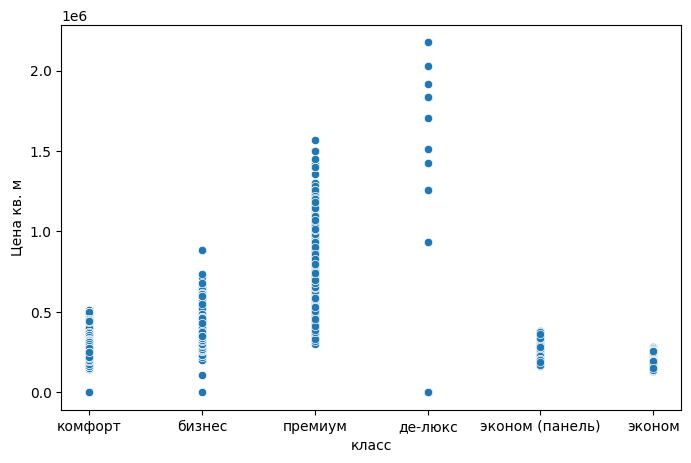

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='класс',y='Цена кв. м',data=df)

* Исселедуем сайты застройщиков чтобы заполнить пробелы в данных

In [15]:

replace_ind2 = df[(df['класс'] == 'де-люкс') & (df['Цена кв. м'] < 0.5*10**6) & (df['Тип Комнатности'] == '2')].index
replace_ind2
replace_ind3 = df[(df['класс'] == 'де-люкс') & (df['Цена кв. м'] < 0.5*10**6) & (df['Тип Комнатности'] == '3')].index
replace_ind3
replace_ind4 = df[(df['класс'] == 'де-люкс') & (df['Цена кв. м'] < 0.5*10**6)].index
replace_ind4
# & (df['Тип Комнатности'] == '4')

Int64Index([10665, 10666, 10667, 10668, 10673, 10674, 10675, 10676, 18433], dtype='int64')

In [16]:
#df.loc[replace_ind2]

* Получаем id для строк с пропущенными значениями

In [17]:
for i in replace_ind4:
    df.loc[i, 'Цена кв. м'] = 2.7*10**6
    df.loc[i, 'Тип Комнатности'] = 4
for i in replace_ind2:
    df.loc[i, 'Цена кв. м'] = 2.55*10**6
for i in replace_ind3:
    df.loc[i, 'Цена кв. м'] = 2.1462*10**6

In [18]:
 # проверяем замену цены

<AxesSubplot: xlabel='класс', ylabel='Цена кв. м'>

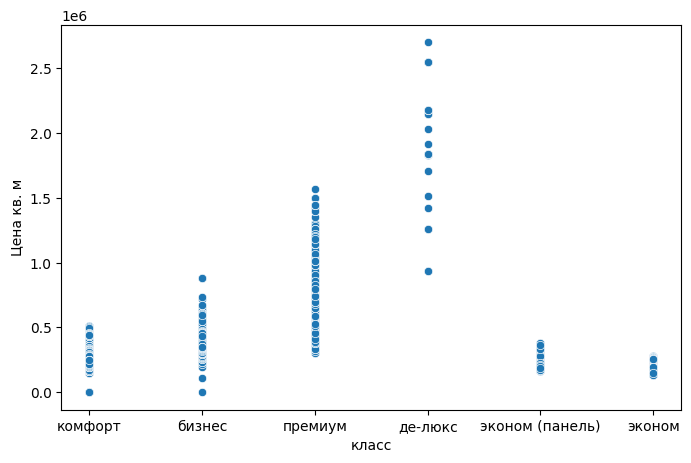

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='класс',y='Цена кв. м',data=df)

* Аналогично для классов бизнес и комфорт

C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\996926886.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 0,1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_28100\996926886.py:2: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, 0,1)


<AxesSubplot: xlabel='класс', ylabel='Цена кв. м'>

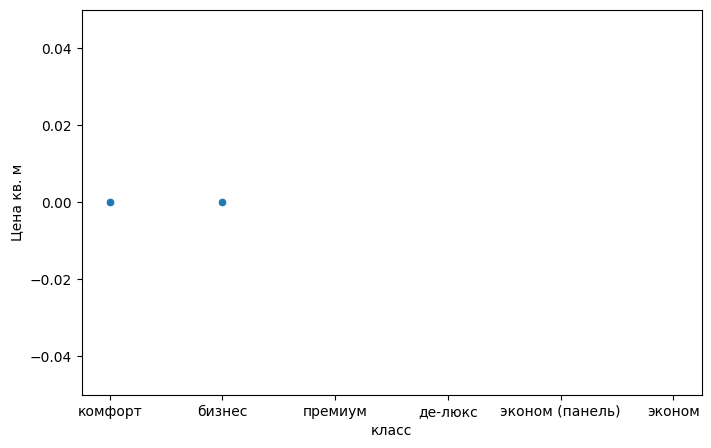

In [20]:
plt.figure(figsize=(8,5))
plt.ylim(0, 0,1)
sns.scatterplot(x='класс',y='Цена кв. м',data=df)

In [21]:
replace_ind_comf = df[(df['класс'] == 'комфорт') & (df['Цена кв. м'] < 0.02*10**6)].index
replace_ind_comf

Int64Index([36197, 36198, 36199, 36200, 36201, 36202, 36204, 36205, 36206,
            36207, 36208],
           dtype='int64')

In [22]:
df.loc[replace_ind_comf]

,ID ЖК,ЖК рус,Район Город,Округ Направление,Регион,Застройщик ЖК,Площадь,Тип Комнатности,Этаж,Тип помещения,...,Тип обременения,Оценка цены,Купил лотов в ЖК,класс,Срок сдачи,Отделка,Зона,Стадия строительства в дату ДДУ,Тип сделки,Цена кв. м
36197,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,23.7,ст,3,квартира,...,NaN,NaN,2,комфорт,4 кв 2021,Есть,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36198,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,60.1,2,3,квартира,...,NaN,NaN,1,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36199,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,42.5,1,7,квартира,...,NaN,NaN,1,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36200,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,21.6,ст,10,квартира,...,ипотека,NaN,1,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36201,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,79.2,NaN,5,квартира,...,NaN,NaN,2,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36202,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,77.4,NaN,6,квартира,...,ипотека,NaN,1,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36204,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,70.5,NaN,20,квартира,...,NaN,NaN,3,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36205,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,107.8,NaN,16,квартира,...,ипотека,NaN,1,комфорт,3 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36206,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,60.1,2,4,квартира,...,NaN,NaN,4,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0
36207,4334,Фреш,Зябликово,ЮАО,Москва,Донстрой,24.6,ст,4,квартира,...,NaN,NaN,1,комфорт,4 кв 2021,Нет,3) от ~ТТК до МКАД,сдан_ГК,ФФ,0.0


In [23]:
for i in [36201, 36202, 36204, 36205]:
    
    df.loc[i, 'Тип Комнатности'] = '3'

In [24]:
#df.loc[replace_ind_comf]

In [25]:
for i in replace_ind_comf:
    if df.loc[i, 'Тип Комнатности'] == 'ст':
        df.loc[i, 'Цена кв. м'] = 380000
    if df.loc[i, 'Тип Комнатности'] == '1':
        df.loc[i, 'Цена кв. м'] = 330000
    if df.loc[i, 'Тип Комнатности'] == '2':
        df.loc[i, 'Цена кв. м'] = 345000
    if df.loc[i, 'Тип Комнатности'] == '3':
        df.loc[i, 'Цена кв. м'] = 325000

In [26]:
#df.loc[replace_ind_comf]

In [27]:
replace_ind_bis = df[(df['класс'] == 'бизнес') & (df['Цена кв. м'] < 0.02*10**6)].index
replace_ind_bis

Int64Index([36209], dtype='int64')

In [28]:
df.drop(index=[36209], inplace=True)

<AxesSubplot: xlabel='класс', ylabel='Цена кв. м'>

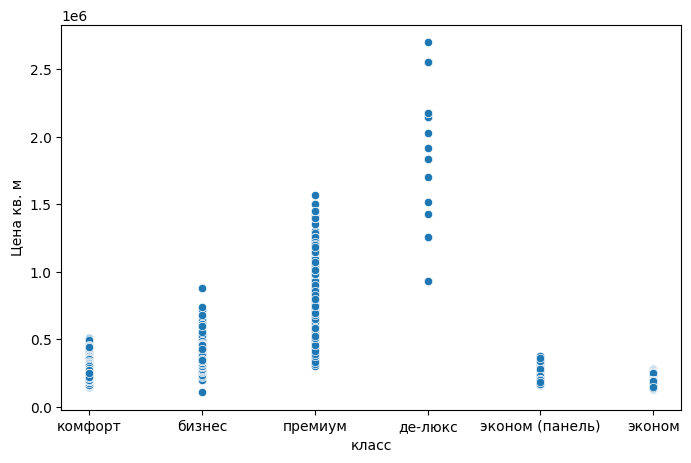

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='класс',y='Цена кв. м',data=df)

In [30]:
df['SalePrice'] = df['Площадь']*df['Цена кв. м']

In [31]:
df.head()

,ID ЖК,ЖК рус,Район Город,Округ Направление,Регион,Застройщик ЖК,Площадь,Тип Комнатности,Этаж,Тип помещения,...,Оценка цены,Купил лотов в ЖК,класс,Срок сдачи,Отделка,Зона,Стадия строительства в дату ДДУ,Тип сделки,Цена кв. м,SalePrice
0,4983,Авиатика,Хорошевский,САО,Москва,Э.К. Девелопмент,58.6,2,22,квартира,...,23019252.0,1,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,ЗФ,392820.0,23019252.0
1,4983,Авиатика,Хорошевский,САО,Москва,Э.К. Девелопмент,90.7,3,11,квартира,...,33422950.0,1,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,ЗФ,368500.0,33422950.0
2,4983,Авиатика,Хорошевский,САО,Москва,Э.К. Девелопмент,105.5,4,19,квартира,...,34593450.0,1,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,ЗФ,327900.0,34593450.0
3,4983,Авиатика,Хорошевский,САО,Москва,Э.К. Девелопмент,22.2,ст,16,квартира,...,11313120.0,1,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,ЗФ,509600.0,11313120.0
4,4983,Авиатика,Хорошевский,САО,Москва,Э.К. Девелопмент,88.8,3,15,квартира,...,32820480.0,1,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,ЗФ,369600.0,32820480.0


In [32]:
percent_nan

Номер                               0.007653
Оценка цены                         0.094390
Продавец ЮЛ                         3.313860
Покупатель ФЛ                       5.847088
Пол                                 5.847088
Корпус                              8.762979
Стадия строительства                8.762979
Срок сдачи                          8.762979
ID Корпус                           8.762979
ID дом.рф                           9.048700
Стадия строительства в дату ДДУ     9.097171
Старт продаж К                     10.171178
Отделка                            32.085002
Тип Комнатности                    32.582464
Номер обременения                  58.580576
Дата обременения                   58.580576
Тип обременения                    58.583127
Залогодержатель                    58.583127
Условия обременения                59.034669
Длительность обременения           59.243858
ЖК англ                            63.019465
Комнатность                        73.504426
Секция    

* Удаление пустых значений

In [33]:
df.dropna(subset=['Тип Комнатности'], inplace=True)
df.dropna(subset=['Оценка цены'], inplace=True)
df.dropna(subset=['Срок сдачи'], inplace=True)
df.dropna(subset=['Отделка'], inplace=True)
df.dropna(subset=['Стадия строительства в дату ДДУ'], inplace=True)

In [34]:
(df.isna().mean()*100).round(2)

ID ЖК                               0.00
ЖК рус                              0.00
Район Город                         0.00
Округ Направление                   0.00
Регион                              0.00
Застройщик ЖК                       0.00
Площадь                             0.00
Тип Комнатности                     0.00
Этаж                                0.00
Тип помещения                       0.00
Дата регистрации                    0.00
Тип обременения                    38.27
Оценка цены                         0.00
Купил лотов в ЖК                    0.00
класс                               0.00
Срок сдачи                          0.00
Отделка                             0.00
Зона                                0.00
Стадия строительства в дату ДДУ     0.00
Тип сделки                          0.00
Цена кв. м                          0.00
SalePrice                           0.00
dtype: float64

In [35]:
df['Дата регистрации'] = pd.to_datetime(df['Дата регистрации'], infer_datetime_format = True, cache=True)

In [36]:
del df['Оценка цены']
del df['Тип обременения']
del df['Купил лотов в ЖК']
del df['Регион']
del df['Тип помещения']
del df['Тип сделки']
df

,ID ЖК,ЖК рус,Район Город,Округ Направление,Застройщик ЖК,Площадь,Тип Комнатности,Этаж,Дата регистрации,класс,Срок сдачи,Отделка,Зона,Стадия строительства в дату ДДУ,Цена кв. м,SalePrice
0,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,58.6,2,22,2022-05-24,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,392820.0000,2.301925e+07
1,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,90.7,3,11,2022-05-26,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,368500.0000,3.342295e+07
2,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,105.5,4,19,2022-05-17,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,327900.0000,3.459345e+07
3,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,22.2,ст,16,2022-05-17,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,509600.0000,1.131312e+07
4,4983,Авиатика,Хорошевский,САО,Э.К. Девелопмент,88.8,3,15,2022-05-12,комфорт,4 кв 2022,Есть,3) от ~ТТК до МКАД,идёт отделка,369600.0000,3.282048e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39193,5151,Я51,Ярославский,СВАО,Patek,44.8,1,7,2022-01-14,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250602.9911,1.122701e+07
39194,5151,Я51,Ярославский,СВАО,Patek,37.3,1,2,2022-01-26,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250603.0027,9.347492e+06
39195,5151,Я51,Ярославский,СВАО,Patek,36.2,1,2,2022-01-26,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,250603.0110,9.071829e+06
39196,5151,Я51,Ярославский,СВАО,Patek,76.7,3,15,2022-02-07,комфорт,2 кв 2022,Нет,3) от ~ТТК до МКАД,верхние этажи,220464.0026,1.690959e+07


In [37]:
df.to_csv("Flat_dataset_moscow_outliers_removed.csv",index=False)